In [1]:
import csv                          # module pour lire lees fichiers CSV
import matplotlib.pyplot as plt     # module pour tracer les graphiques

### Lecture des données depuis un fichier de 'pointage' au format CSV
Avec affichage des premières lignes de données (remarquer en particulier les 1eres lignes qui indiquent les descripteurs)

In [2]:
with open('chrono.csv', 'r') as f:   # ouverture du fichier
    data = list(csv.reader(f))       # extration des données
    
# affichage des premières lignes
for ligne in data[:5]:
    print(ligne)

['t', 'x', 'y']
['s', 'm', 'm']
['0.0', '0.144', '-0.135']
['0.04', '0.157', '-0.116']
['0.08', '0.169', '-0.099']


### Extraction en 3 listes des instants t, et des abscisses et ordonnées x et y
*Remarque 1* :  adapter l'indice du début pour "sauter" les lignes d'en-tête

*Remarque 2* :  le fichier CSV contient des données sous forme de texte qu'il faut convertir en nombre (`float`)

In [3]:
t = [float(ligne[0]) for ligne in data[2:]]
x = [float(ligne[1]) for ligne in data[2:]]
y = [float(ligne[2]) for ligne in data[2:]]

### Représentation graphique des positions 

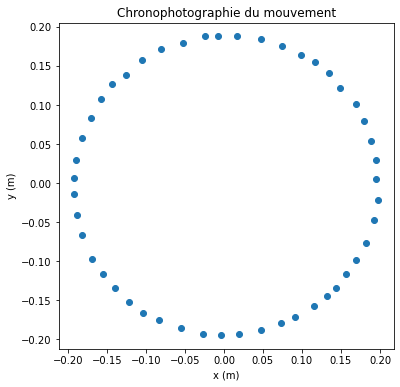

In [4]:
plt.figure(figsize=(6, 6))   # taille du graphique (en pouces)
plt.axis('equal')            # pour avoir un repère orthonormé
plt.plot(x, y, 'o')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.title('Chronophotographie du mouvement')
plt.show()

### Calcul des coordonnées du vecteur vitesse
$v_xi = \dfrac{M_{i-1}M_{i+1}}{t_{i+1} - t_{i-1}} $

$v_x[i] = \dfrac{x[i+1] - x[i-1]}{t[i+1] - t[i-1]}$

*Remarque* : on ne peut pas calculer les cordonnées du vecteur vitesse au premier point et au dernier point !

### Représentation graphique du vecteur vitesse (arrow)
*On représente un vecteur vitesse en déssinant une flèche (arrow).*

`plt.arrow` permet de tracer des vecteurs (simples flèches). 
La syntaxe utilisée repose sur le modèle suivant : `plt.arrow(x, y, vect_x, vect_y)` 

- x et y sont les coordonnées du point d'origine de la représenation du vecteur.
- vec_x et vect_y sont les coordonnées du vecteur.

ATTENTION : Il faut définir une échelle de vitesse pour tracer la flèche représentant le vecteur vitesse. (on pourra le faire par tatônnement)

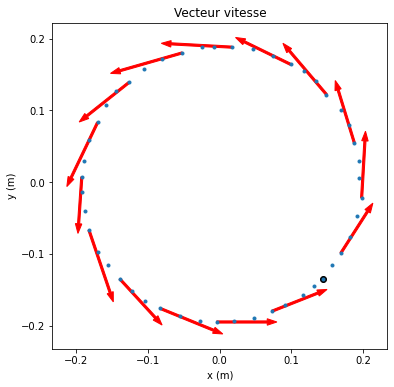

In [5]:
plt.figure(figsize=(6, 6))   # taille du graphique (en pouces)
plt.axis('equal')            # pour avoir un repère orthonormé
plt.plot(x, y, '.')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.scatter(x[0], y[0], color='black') # position initiale

echelle = 7                 # facteur d'échelle de représentation des vitesses
for i in range(2, len(t)-2, 3):
    # ex : i = 5 
    # vx5 = (x6 - x4) / (t6 - t4)
    # vy5 = (y6 - y4) / (t6 - t4)
    # COMPLÉTER LES DEUX LIGNES SUIVANTES :
    # vxi = ...
    # vyi = ...
    vxi = (x[i+1] - x[i-1]) / (t[i+1] - t[i-1])  
    vyi = (y[i+1] - y[i-1]) / (t[i+1] - t[i-1]) 
    
    vxi, vyi = vxi/echelle, vyi/echelle # mise à l'échelle
    # Tracer du vecteur de coordonnées (vxi, vyi) au point (x[i], y[i]) :
    plt.arrow(x[i], y[i], vxi, vyi, color='red', length_includes_head=True, width=.003)
    
plt.title('Vecteur vitesse')
plt.show()

### Représentation graphique du variation du vecteur vitesse (arrow)
On propose en un point $i$ le vecteur vitesse au point suivant $\overrightarrow{v_{i+1}}$, l'opposé du vecteur vitesse du point précédent $-\overrightarrow{v_{i-1}}$, et le vecteur variation de vitesse $\overrightarrow{\Delta v_i} = \overrightarrow{v_{i+1}} - \overrightarrow{v_{i-1}}$.

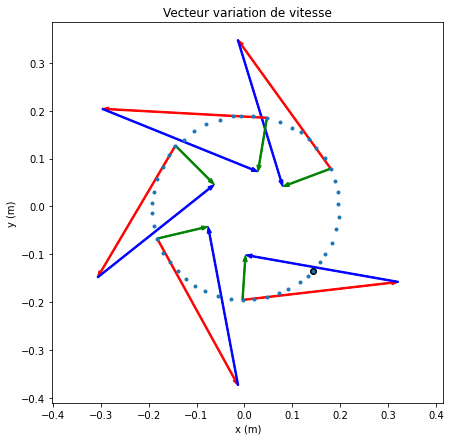

In [6]:
plt.figure(figsize=(7, 7))   # taille du graphique (en pouces)
plt.axis('equal')            # pour avoir un repère orthonormé
plt.plot(x, y, '.')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.scatter(x[0], y[0], color='black')

echelle = 2
for i in [9, 16, 24, 32, 41]:  # points où l'on va tracer les vecteurs variations de vitesse
    # ex : au point i = 4  
    vxip1 = (x[i+2] - x[i]) / (t[i+2] - t[i])  # vx[i+1] => vx5 = (x6 - x4) / (t6 - t4)
    vyip1 = (y[i+2] - y[i]) / (t[i+2] - t[i])  # vy[i+1] => vy5 = (y6 - y4) / (t6 - t4)
    vxim1 = (x[i] - x[i-2]) / (t[i] - t[i-2])  # vx[i-1] => vx3 = (x4 - x2) / (t4 - t2)
    vyim1 = (y[i] - y[i-2]) / (t[i] - t[i-2])  # vy[i-1] => vy3 = (y4 - y2) / (t4 - t2)
    # COMPLÉTER LA LIGNE SUIVANTE (coordonnées du vecteur variation de vitesse ):
    #Dvxi = ... 
    #Dvyi = ...
    Dvxi = vxip1 - vxim1                       # Dvx4 = vx5 - vx3
    Dvyi = vyip1 - vyim1                       # Dvy4 = vy5 - vy3
    # mise à l'échelle :
    vxip1, vyip1, vxim1, vyim1 = vxip1/echelle, vyip1/echelle, vxim1/echelle, vyim1/echelle
    Dvxi, Dvyi = Dvxi/echelle, Dvyi/echelle
    
    plt.arrow(x[i], y[i], vxip1, vyip1, color='red', length_includes_head=True, width=.003)
    plt.arrow(x[i]+vxip1, y[i]+vyip1, -vxim1, -vyim1, color='blue', length_includes_head=True, width=.003)
    # COMPLÉTER LA LIGNE SUIVANTE POUR TRACER LE VECTEUR VARIATION DE VITESSE AU POINT i:
    # plt.arrow(..., ..., ..., ..., color='green', length_includes_head=True, width=.003)
    plt.arrow(x[i], y[i], Dvxi, Dvyi, color='green', length_includes_head=True, width=.003)

plt.title('Vecteur variation de vitesse')
plt.show()

# Un autre exemple : chute parabolique
Pour finir, on propose d'étudier de manière similaire un autre mouvement. Celui d'une balle de tennis lancée en l'air.
Le fichier de pointage est <code>tennis-parabole.csv</code>.

1. Tracer la variation du vecteur vitesse aux points i=8 et i=15.
2. Décrire ce vecteur (direction et sens).
3. Comparer aux forces appliquées à la balle de tennis pendant son "vol".

In [7]:
with open('tennis-parabole.csv', 'r') as f:   # ouverture du fichier
    data = list(csv.reader(f))       # extration des données
    
t = [float(ligne[0]) for ligne in data[2:]]
x = [float(ligne[1]) for ligne in data[2:]]
y = [float(ligne[2]) for ligne in data[2:]]

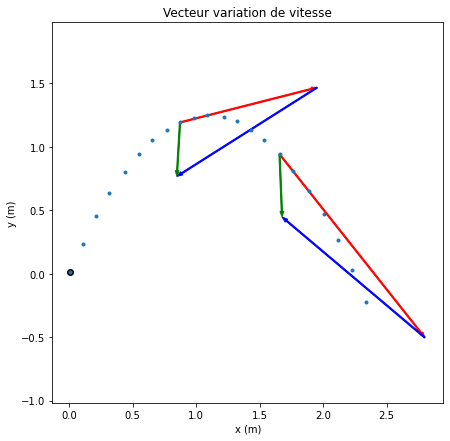

In [8]:
plt.figure(figsize=(7, 7))   # taille du graphique (en pouces)
plt.axis('equal')            # pour avoir un repère orthonormé
plt.plot(x, y, '.')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.scatter(x[0], y[0], color='black')

echelle = 2

for i in (8, 15):
    # ex : i = 4  
    vxip1 = (x[i+2] - x[i]) / (t[i+2] - t[i])  # vx5 = (x6 - x4) / (t6 - t4)
    vyip1 = (y[i+2] - y[i]) / (t[i+2] - t[i])  # vy5 = (y6 - y4) / (t6 - t4)
    vxim1 = (x[i] - x[i-2]) / (t[i] - t[i-2])  # vx3 = (x4 - x2) / (t4 - t2)
    vyim1 = (y[i] - y[i-2]) / (t[i] - t[i-2])  # vy3 = (y4 - y2) / (t4 - t2)
    Dvxi = vxip1 - vxim1                       # Dvx4 = vx5 - vx3
    Dvyi = vyip1 - vyim1                       # Dvy4 = vy5 - vy3
    vxip1, vyip1, vxim1, vyim1 = vxip1/echelle, vyip1/echelle, vxim1/echelle, vyim1/echelle
    Dvxi, Dvyi = Dvxi/echelle, Dvyi/echelle
    plt.arrow(x[i], y[i], vxip1, vyip1, color='red', length_includes_head=True, width=.01)
    plt.arrow(x[i]+vxip1, y[i]+vyip1, -vxim1, -vyim1, color='blue', length_includes_head=True, width=.01)
    plt.arrow(x[i], y[i], Dvxi, Dvyi, color='green', length_includes_head=True, width=.01)

plt.title('Vecteur variation de vitesse')
plt.show()